This ipython notebook is for submission of Course380L Problem Set 1 </p> 
Created by Meen-Hong Hung

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as spy
import matplotlib as plt

# Question 1

In [285]:
CSprof = pd.read_csv('cs52.csv')
CSprof.head(5)

,Name,University,JoinYear,Rank,Subfield,Bachelors,Masters,Doctorate,PostDoc,Sources1,Sources2,Sources3,Sources4
0,Chitta Baral,Arizona State University,1999,Full,Natural Language & Speech,Indian Institute of Technology - Kanpur - India,University of Maryland - College Park - USA,University of Maryland - College Park - USA,NaN,http://cidse.engineering.asu.edu/directory/chi...,NaN,NaN,NaN
1,Kasim Candan,Arizona State University,1997,Full,Databases,Bilkent University - Turkey,NaN,University of Maryland - College Park - USA,NaN,http://cidse.engineering.asu.edu/directory/can...,NaN,NaN,NaN
2,Charles Colbourn,Arizona State University,2001,Full,Networks & Communications,University of Toronto - Canada,University of Waterloo - Ontario - Canada,University of Toronto - Canada,NaN,http://cidse.engineering.asu.edu/directory/cha...,NaN,NaN,NaN
3,James Collofello,Arizona State University,1979,Full,Software Engineering,Northern Illinois University - USA,Northern Illinois University - USA,Northwestern University - USA,NaN,http://cidse.engineering.asu.edu/directory/col...,NaN,NaN,NaN
4,Sandeep Gupta,Arizona State University,2001,Full,Distributed & Parallel Computing,NaN,NaN,Ohio State University - USA,NaN,http://cidse.engineering.asu.edu/directory/gup...,NaN,NaN,NaN


In [293]:
CSprof[(CSprof['University']=='University of California - Berkeley')&(CSprof['Doctorate']=='University of California - Berkeley - USA')].count()


Name          13
University    13
JoinYear      12
Rank          13
Subfield      13
Bachelors     10
Masters        7
Doctorate     13
PostDoc        1
Sources1      13
Sources2       4
Sources3       0
Sources4       0
dtype: int64

The total count of Berkley professor who obtained phD from Berkley is 13.

# Question2

In [2]:
electric = pd.read_csv('electric.dat',delim_whitespace=True)
electric.head(5)

,City,Grade,treated.Pretest,treated.Posttest,control.Pretest,control.Posttest,Supplement?
0,F,1,13.8,48.9,12.3,52.3,S
1,F,1,16.5,70.5,14.4,55.0,R
2,F,1,18.5,89.7,17.7,80.4,S
3,F,1,8.8,44.2,11.5,47.0,R
4,F,1,15.3,77.5,16.4,69.7,S


The followin is the scatter plot of control.Posttest against teated.Posttest under Supplement group 

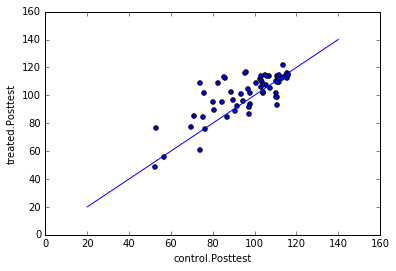

In [53]:
electS= electric[electric['Supplement?']=='S']
electS.plot(kind='scatter', x='control.Posttest', y='treated.Posttest')
x= np.linspace(20,140,10)
y= x
plt.pyplot.plot(x,y)


The Sample Average of Treated-Posttest - Control.Posttel for the S group is 

In [60]:
np.average(electS['treated.Posttest']-electS['control.Posttest'])

4.8245901639344275

The followin is the scatter plot of control.Posttest against teated.Posttest under Replacement group 

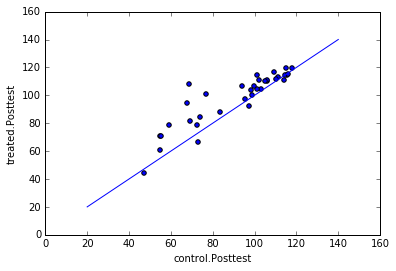

In [64]:
electR=electric[electric['Supplement?']=='R']
electR.plot(kind='scatter', x='control.Posttest', y='treated.Posttest')
x= np.linspace(20,140,10)
y= x
plt.pyplot.plot(x,y)

The Sample Average of Treated-Posttest - Control.Posttel for R group is

In [62]:
np.average(electR['treated.Posttest']-electR['control.Posttest'])

7.1085714285714294

(BONUS) Are the results uniform across the student groups? 
Ans: I calculate the sample average of difference of treated.Posttest and control.Posttest and then layout the mean across different groups.

The result is not uniform across student groups. In City F, 2nd Grade students benefited the most by thie experiment. In City Y, 1st grade students benefited the most by this experiment.

In [98]:
electric['diff.Posttest']=electric['treated.Posttest']-electric['control.Posttest']
electric.groupby(['City','Grade','Supplement?'])['diff.Posttest'].mean()


City  Grade  Supplement?
F     1      R               7.375000
             S              -0.014286
      2      R              12.200000
             S              10.050000
      3      R               2.950000
             S              -1.862500
      4      R               4.000000
             S               7.650000
Y     1      R              13.466667
             S              14.928571
      2      R               7.337500
             S               5.991667
      3      R               4.700000
             S               0.228571
      4      R               1.750000
             S               0.833333
Name: diff.Posttest, dtype: float64

# Question 3

In [46]:
pollution = pd.read_stata('pollution.dta')
pollution.head(5)

,prec,jant,jult,ovr65,popn,educ,hous,dens,nonw,wwdrk,poor,hc,nox,so2,humid,mort
0,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.870
1,35,23,72,11.1,3.14,11.0,78.8,4281,3.5,50.7,14.4,8,10,39,57,997.875
2,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.354
3,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.291
4,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.289


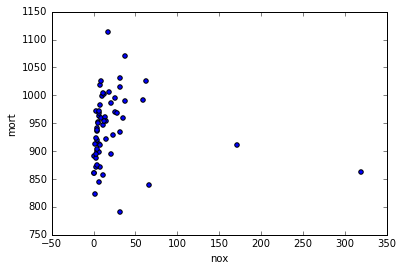

In [47]:
pollution.plot(kind='scatter', x='nox',y='mort')

[ -1.03887062e-01   9.42711475e+02]


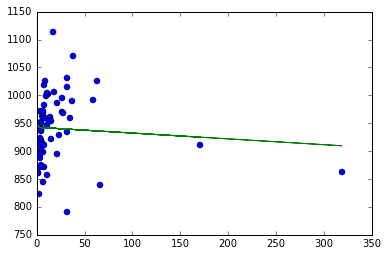

In [52]:
x=np.array(pollution['nox'])
y=np.array(pollution['mort'])
beta = np.polyfit(x,y,1)
poly = np.poly1d(beta)
ys = poly(x)


plt.pyplot.plot(x, y, 'o')
plt.pyplot.plot(x, ys)

print beta


[ 0.01589323  6.80717471]


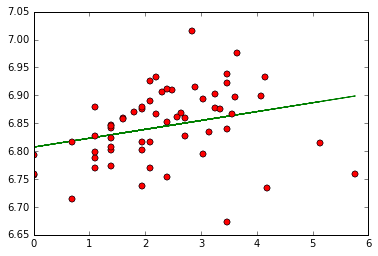

In [55]:
x=np.array(pollution['nox'])
y=np.array(pollution['mort'])
y=np.log(y)
x=np.log(x)

beta = np.polyfit(x,y,1)
poly = np.poly1d(beta)
ys = poly(x)

plt.pyplot.plot(x, y, 'o')
plt.pyplot.plot(x, ys)
plt.pyplot.plot(x, y, 'o')

print beta



# Question 4

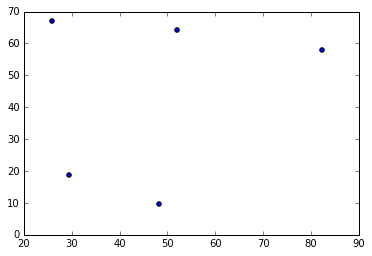

In [202]:
x = 100*np.random.rand(5)
y = 100*np.random.rand(5)
plt.pyplot.scatter(x,y)

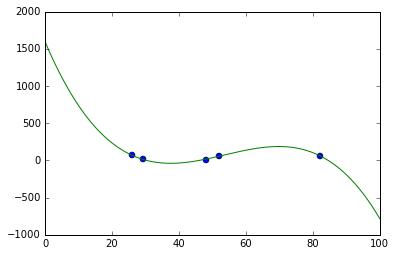

In [204]:
coeff=np.polyfit(x,y,3)
polynomial = np.poly1d(coeff)
xs = np.arange(0, 100, 0.0001)
ys = polynomial(xs)
plt.pyplot.plot(x,y,'o')
plt.pyplot.plot(xs,ys)


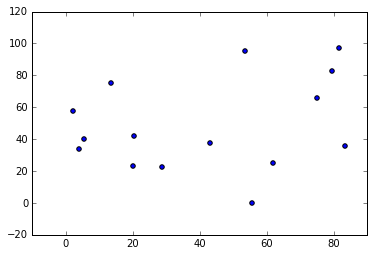

In [3]:
x = 100*np.random.rand(15)
y = 100*np.random.rand(15)
plt.pyplot.scatter(x,y)

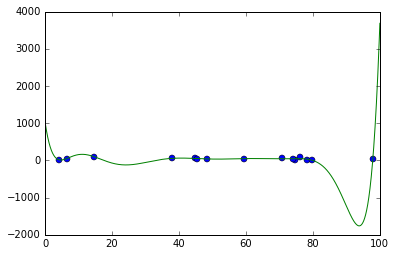

In [8]:
coeff=np.polyfit(x,y,10)
polynomial = np.poly1d(coeff)
xs = np.arange(0, 100, 0.0001)
ys = polynomial(xs)
plt.pyplot.plot(x,y,'o')
plt.pyplot.plot(xs,ys)


From observation, given more points on the plan, it takes higher degree of polynomial to touch through all the points

# Question 5

In [56]:
def puc(p):
 for i in range(3000):
  x = np.array([np.random.rand()*2-1,np.random.rand()*2-1])
  if np.linalg.norm(x,p) < 1:
   plt.pylab.scatter(x[0],x[1],facecolors='none',edgecolors='blue')
 plt.pylab.axis([-1.0, 1.0, -1.0, 1.0])
 plt.pylab.show()

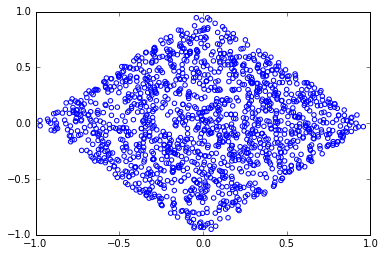

In [57]:
puc(1)

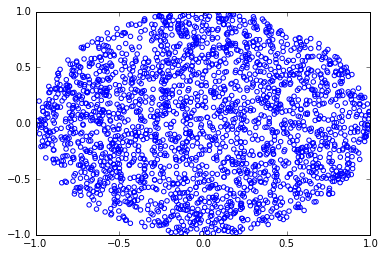

In [58]:
puc(2)

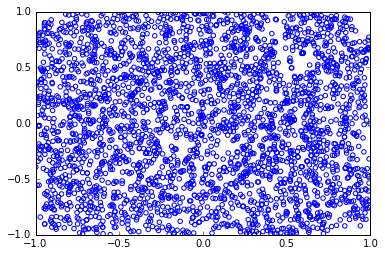

In [59]:
puc(10)

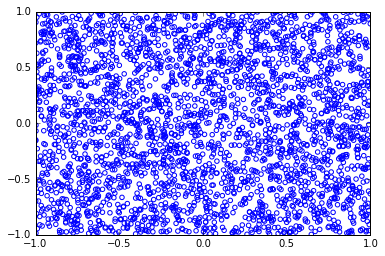

In [61]:
puc(np.inf)

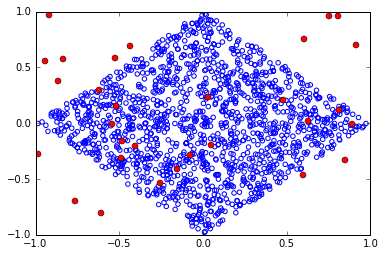

In [64]:
x = 2*np.random.rand(30)-1
y = 2*np.random.rand(30)-1
plt.pyplot.plot(x,y,'ro')
plt.pylab.axis([-1.0, 1.0, -1.0, 1.0])
puc(1)

The known volume is 1x1, so by generating 30 random points in 2x2 volumn square, I found that 15 points are in unit ball of L1-norm. so 15/30*4=2

The approx volume of L1-norm unit ball is 2

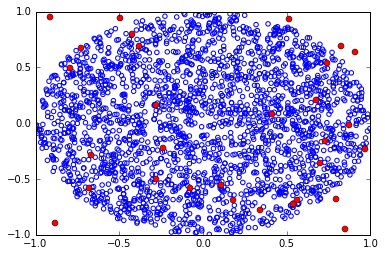

In [65]:
x = 2*np.random.rand(30)-1
y = 2*np.random.rand(30)-1
plt.pyplot.plot(x,y,'ro')
plt.pylab.axis([-1.0, 1.0, -1.0, 1.0])
puc(2)

The known volume is 1x1, so by generating 30 random points in 1x1 volumn square, I found that 21 points are in unit ball of L2-norm. so 21/30*4 approx equal to 2.8

The approx volume of L2-norm unit ball is 2.8

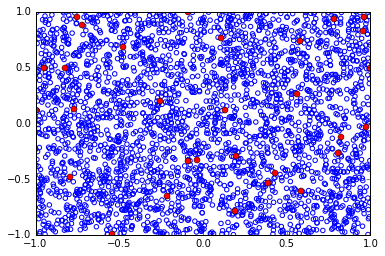

In [66]:
x = 2*np.random.rand(30)-1
y = 2*np.random.rand(30)-1
plt.pyplot.plot(x,y,'ro')
plt.pylab.axis([-1.0, 1.0, -1.0, 1.0])
puc(np.inf)

The known volume is 1x1, so by generating 30 random points in 1x1 volumn square, I found that 30 points are in unit ball of L-inf-norm. so 30/30*4=4

The approx volume of L1-norm unit ball is 4

(BONUS) The implementation of estimating the volume of n-dimensional L2 unit ball, is to take n-dimentional hypercube to estimate it
    

In [252]:
def gend(d,n):
    z=0
    y=[]
    for i in range(d):
        x = 2*np.random.rand(n)-1
        y.append(x)
    b=np.array(y)
    for a in range(n):
        if np.linalg.norm(b[:,a])<1:
            z=z+1
    return z,n,d,1.*z/n*(2**d)

In this exercise the easiest known volumn in d-dimension is a hypercube which has the volume of 2^d.

I wrote a function gend() that takes in d (dimension) and n (sample), where output returns 

(z= total sample in the unit ball, 
n= total sample in the hyercube, 
d= dimension of the unit ball, 
z/n*(2^d)= fraction of sample in the unit ball times the volume of hyper cube)

As we can see from the above exmaples where we take d=5, as n increases the approx of the volume gets closer to the true value which is 5.26

In [258]:
gend(5,20)

(2, 20, 5, 3.2)

In [272]:
gend(5,2000)

(355, 2000, 5, 5.68)

In [263]:
gend(5,200000)

(32705, 200000, 5, 5.2328)

In case of d = 10, true volume is 2.55, again when sample increases the monte carlo approx gets closer to the 10-dimensional ball volume.

In [276]:
gend(10,2000)

(6, 2000, 10, 3.072)

In [278]:
gend(10,20000)

(48, 20000, 10, 2.4576)

In case of d = infinity, the true volume is pi^(inf/2)/gamma(inf) which is undefined
So since my function requires a integer type for dimension. np.inf will not work in this case.

# Question 6 